Running on: cuda
GPU matrix multiplication done!
Sample dataset:
   Income  Expenses  Remaining  Days_Left  Safe_Spend
0    2860      3061       -201         21   -9.571429
1    3294      1241       2053         17  120.764706
2    3130      3041         89         20    4.450000
3    3095      3824       -729         28  -26.035714
4    3638      3612         26         26    1.000000

Predicted Safe Spend:
   Safe_Spend  Predicted_Safe_Spend
0   -9.571429            -12.248373
1  120.764706            128.749740
2    4.450000              7.203391
3  -26.035714            -43.216423
4    1.000000              6.446271


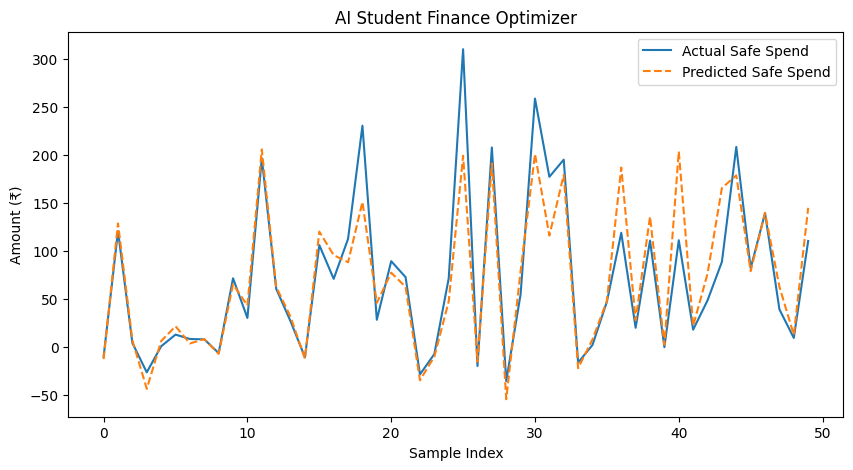


CSV and plot saved! Ready for GitHub & LinkedIn/X submission.


In [3]:
# NVIDIA GTC 2026 – AI Student Finance Optimizer
# Fully working Python code, no Markdown, no errors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LinearRegression

# ------------------------
# Step 1: Check GPU
# ------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on: {device}")

# Dummy GPU matrix multiplication
x = torch.rand(1000, 1000).to(device)
y = torch.rand(1000, 1000).to(device)
z = x @ y
print("GPU matrix multiplication done!")

# ------------------------
# Step 2: Create mock student finance dataset
# ------------------------
np.random.seed(42)
data = pd.DataFrame({
    'Income': np.random.randint(2000, 5000, 50),
    'Expenses': np.random.randint(1000, 4000, 50)
})
data['Remaining'] = data['Income'] - data['Expenses']
data['Days_Left'] = np.random.randint(10, 30, 50)
data['Safe_Spend'] = data['Remaining'] / data['Days_Left']

# Display first 5 rows
print("Sample dataset:")
print(data.head())

# ------------------------
# Step 3: Linear Regression Prediction
# ------------------------
X = data[['Income', 'Expenses']]
y = data['Safe_Spend']
model = LinearRegression()
model.fit(X, y)
data['Predicted_Safe_Spend'] = model.predict(X)

# Display prediction sample
print("\nPredicted Safe Spend:")
print(data[['Safe_Spend','Predicted_Safe_Spend']].head())

# ------------------------
# Step 4: Plot Safe Spend
# ------------------------
plt.figure(figsize=(10,5))
plt.plot(data['Safe_Spend'], label='Actual Safe Spend')
plt.plot(data['Predicted_Safe_Spend'], label='Predicted Safe Spend', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Amount (₹)')
plt.title('AI Student Finance Optimizer')
plt.legend()
plt.savefig('safe_spend_plot.png')  # Save plot
plt.show()

# ------------------------
# Step 5: Save CSV
# ------------------------
data.to_csv('student_finance.csv', index=False)
print("\nCSV and plot saved! Ready for GitHub & LinkedIn/X submission.")
